# Predecir el speechiness de una canción según su info :)

Utilizaré el dataset [Twenty One Pilots Discography](https://www.kaggle.com/datasets/federicoseijo/twenty-one-pilots-discography) de Federico Seijo. 
Este dataset contiene 26 distintas columnas: *album_release_date, album_release_year, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, disc_number, duration_ms, explicit, is_local, track_name, track_number, type, album_name, key_name, mode_name, key_mode*

Con este dataset, se entrenará un modelo de regresión lineal y polinomial que predecirá la speechiness de las canciones según los info de las otras características :)

## Preprocesamiento

Muy bien, ahora haremos extraeremos el dataset y realizaremos un par de consultas para limpiar los datos y prepararlos para su uso

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('twentyscience.csv')
df

,Unnamed: 0,album_release_date,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,explicit,is_local,track_name,track_number,type,album_name,key_name,mode_name,key_mode
0,1,2021-05-21,2021,0.684,0.677,7,-7.355,1,0.0401,0.110000,...,204400,False,False,Good Day,1,track,Scaled And Icy,G,major,G major
1,2,2021-05-21,2021,0.700,0.664,7,-8.211,1,0.0394,0.306000,...,223065,False,False,Choker,2,track,Scaled And Icy,G,major,G major
2,3,2021-05-21,2021,0.588,0.856,9,-5.242,0,0.0316,0.000818,...,175044,False,False,Shy Away,3,track,Scaled And Icy,A,minor,A minor
3,4,2021-05-21,2021,0.785,0.623,11,-6.923,1,0.0403,0.050500,...,216758,False,False,The Outside,4,track,Scaled And Icy,B,major,B major
4,5,2021-05-21,2021,0.687,0.890,8,-5.990,1,0.0344,0.003960,...,172232,False,False,Saturday,5,track,Scaled And Icy,G#,major,G# major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,2009-12-29,2009,0.550,0.625,1,-8.213,0,0.0399,0.149000,...,277013,False,False,Trapdoor,10,track,Twenty One Pilots,C#,minor,C# minor
126,127,2009-12-29,2009,0.618,0.732,5,-4.609,1,0.0724,0.147000,...,273786,False,False,"A Car, A Torch, A Death",11,track,Twenty One Pilots,F,major,F major
127,128,2009-12-29,2009,0.567,0.572,9,-7.694,1,0.0318,0.166000,...,285733,False,False,Taxi Cab,12,track,Twenty One Pilots,A,major,A major
128,129,2009-12-29,2009,0.363,0.135,7,-11.166,0,0.0295,0.976000,...,233000,False,False,Before You Start Your Day,13,track,Twenty One Pilots,G,minor,G minor


In [3]:
df.dtypes

Unnamed: 0              int64
album_release_date     object
album_release_year      int64
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
disc_number             int64
duration_ms             int64
explicit                 bool
is_local                 bool
track_name             object
track_number            int64
type                   object
album_name             object
key_name               object
mode_name              object
key_mode               object
dtype: object

In [4]:
df.drop(["Unnamed: 0", 'time_signature', 'album_release_date',
         'disc_number', 'is_local', 'track_number', 'type',
         'key_name', 'mode_name', 'key_mode', 'track_name', 
         'album_name', 'album_release_year'], axis=1, inplace=True)

In [5]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit
0,0.684,0.677,7,-7.355,1,0.0401,0.110000,0.009750,0.3400,0.370,142.048,204400,False
1,0.700,0.664,7,-8.211,1,0.0394,0.306000,0.000019,0.2490,0.585,142.009,223065,False
2,0.588,0.856,9,-5.242,0,0.0316,0.000818,0.073900,0.2380,0.635,96.966,175044,False
3,0.785,0.623,11,-6.923,1,0.0403,0.050500,0.125000,0.0539,0.711,100.991,216758,False
4,0.687,0.890,8,-5.990,1,0.0344,0.003960,0.000939,0.0436,0.854,113.060,172232,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.550,0.625,1,-8.213,0,0.0399,0.149000,0.000000,0.1610,0.317,149.927,277013,False
126,0.618,0.732,5,-4.609,1,0.0724,0.147000,0.000009,0.0925,0.444,140.086,273786,False
127,0.567,0.572,9,-7.694,1,0.0318,0.166000,0.000000,0.1030,0.205,138.062,285733,False
128,0.363,0.135,7,-11.166,0,0.0295,0.976000,0.000265,0.1070,0.195,98.450,233000,False


In [6]:
df['explicit'] = df['explicit'].astype(bool)

Ahora que elegimos las columnas con las que se trabajará, podemos seguir con preparar el dataset en términos de los datos faltantes y nulos :p

In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.654854,0.583603,5.738462,-8.981623,0.676923,0.148484,0.226543,0.008329,0.194374,0.501225,119.364477,231247.961538
std,0.107727,0.232604,3.555875,6.433351,0.469461,0.268976,0.271016,0.029514,0.160468,0.197895,26.387891,69952.430540
min,0.228000,0.023100,0.000000,-29.028000,0.000000,0.025500,0.000163,0.000000,0.043600,0.088200,54.531000,28787.000000
25%,0.589000,0.467500,2.000000,-8.329000,0.000000,0.039525,0.043700,0.000000,0.087400,0.355250,97.337000,202849.750000
50%,0.680000,0.647500,6.000000,-6.803500,1.000000,0.045800,0.106500,0.000010,0.146000,0.479000,120.009000,238787.000000
75%,0.728750,0.759750,9.000000,-5.699000,1.000000,0.079700,0.289250,0.000465,0.239500,0.640250,140.005750,267720.000000
max,0.840000,0.937000,11.000000,-3.608000,1.000000,0.959000,0.994000,0.226000,0.849000,0.969000,173.995000,370808.000000


In [8]:
df.count()

danceability        130
energy              130
key                 130
loudness            130
mode                130
speechiness         130
acousticness        130
instrumentalness    130
liveness            130
valence             130
tempo               130
duration_ms         130
explicit            130
dtype: int64

In [9]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
dtype: int64

In [10]:
df.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit
58,0.446,0.7600,7,-3.608,1,0.0453,0.00891,0.000108,0.232,0.512,150.033,308388,False
72,0.501,0.5300,9,-13.256,0,0.0346,0.00624,0.003100,0.705,0.350,130.000,286389,False
111,0.537,0.0231,7,-14.407,1,0.0475,0.99400,0.047100,0.146,0.342,120.322,142546,False
84,0.584,0.8330,6,-5.900,1,0.0410,0.00359,0.000034,0.169,0.324,140.013,267386,False
56,0.683,0.1820,3,-29.028,1,0.9580,0.58400,0.000000,0.262,0.383,88.791,64524,False
118,0.733,0.6360,9,-6.693,1,0.0299,0.15800,0.000000,0.320,0.591,99.996,213200,False
107,0.798,0.3180,10,-6.849,0,0.0431,0.04370,0.000000,0.158,0.425,92.490,229000,False
88,0.446,0.7600,7,-3.608,1,0.0453,0.00891,0.000108,0.232,0.512,150.033,308388,False
6,0.674,0.5350,2,-7.114,1,0.0518,0.01380,0.000000,0.326,0.716,170.188,224398,False
128,0.363,0.1350,7,-11.166,0,0.0295,0.97600,0.000265,0.107,0.195,98.450,233000,False


In [11]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
explicit               bool
dtype: object

Ahora que sabemos que no hay datos faltantes, ni nulos, podemos comenzar a trabajar sobre el dataset :)

## Definiendo y separando las variables independientes de la dependiente (speechiness)

In [12]:
X = df.drop('speechiness', axis=1)
y = df['speechiness']

X

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit
0,0.684,0.677,7,-7.355,1,0.110000,0.009750,0.3400,0.370,142.048,204400,False
1,0.700,0.664,7,-8.211,1,0.306000,0.000019,0.2490,0.585,142.009,223065,False
2,0.588,0.856,9,-5.242,0,0.000818,0.073900,0.2380,0.635,96.966,175044,False
3,0.785,0.623,11,-6.923,1,0.050500,0.125000,0.0539,0.711,100.991,216758,False
4,0.687,0.890,8,-5.990,1,0.003960,0.000939,0.0436,0.854,113.060,172232,False
...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.550,0.625,1,-8.213,0,0.149000,0.000000,0.1610,0.317,149.927,277013,False
126,0.618,0.732,5,-4.609,1,0.147000,0.000009,0.0925,0.444,140.086,273786,False
127,0.567,0.572,9,-7.694,1,0.166000,0.000000,0.1030,0.205,138.062,285733,False
128,0.363,0.135,7,-11.166,0,0.976000,0.000265,0.1070,0.195,98.450,233000,False


## División del dataset entre entrenamiento y prueba

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Escalamiento

In [14]:

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


# Prueba de distintos modelos
## Regresión lineal


In [15]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [16]:
#ypred_linear = model.predict(xtest_scaled)
ypred_linear = model.predict(xtest)

mse_linear = mean_squared_error(ytest, ypred_linear)

#score_linear = model.score(xtest_scaled, ytest)
score_linear = model.score(xtest, ytest)

print("Score:", score_linear)
print("MSE:", mse_linear)

Score: 0.898636988757056
MSE: 0.005900326165822803


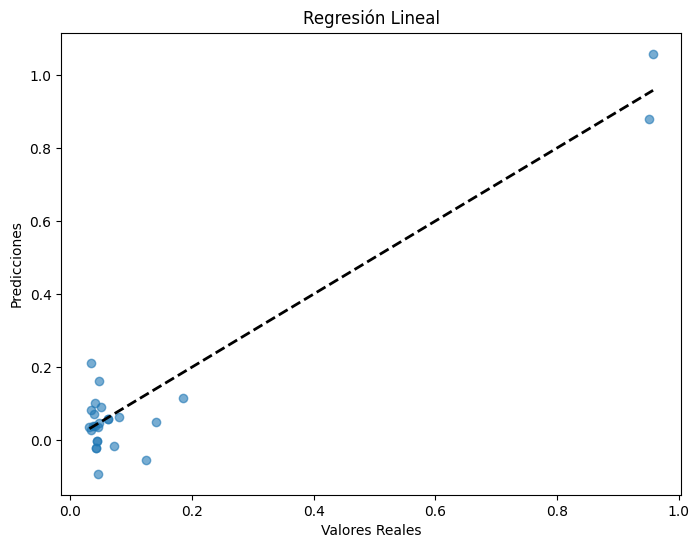

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_linear, alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal')
plt.show()

## Regresión Polinomial 

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree = 3)
xtrain_poly = poly.fit_transform(xtrain_scaled)
xtest_poly = poly.transform(xtest_scaled)

#xtrain_poly = poly.fit_transform(xtrain)
#xtest_poly = poly.transform(xtest)

In [37]:
# entrenamiento 
poly_model = LinearRegression()
poly_model.fit(xtrain_poly, ytrain)

LinearRegression()

In [38]:
# predicciones 
ypred_poly = poly_model.predict(xtest_poly)
mse_poly = mean_squared_error(ytest, ypred_poly)
score_poly = poly_model.score(xtest_poly, ytest)

print("Score:", score_poly)
print("MSE:", mse_poly)

Score: 0.9001889649232746
MSE: 0.005809985858545171


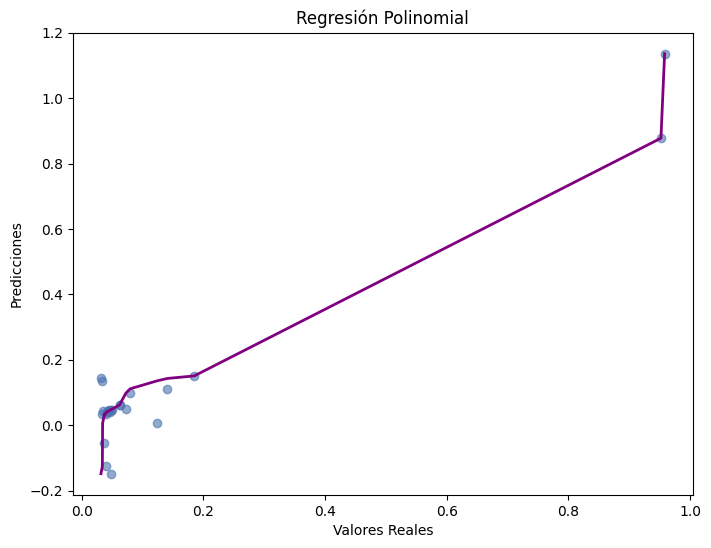

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_poly, alpha=0.6)
plt.plot(sorted(ytest), sorted(ypred_poly), color='purple', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Polinomial')
plt.show()

## Comparación de los modelos
 Con distintas métricas

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_linear = r2_score(ytest, ypred_linear)
r2_poly = r2_score(ytest, ypred_poly)

mae_linear = mean_absolute_error(ytest, ypred_linear)
mae_poly = mean_absolute_error(ytest, ypred_poly)

data = {
    'Modelo': ['Regresión Lineal', 'Regresión Polinomial'],
    'Score': [score_linear,score_poly],
    'MSE': [mse_linear, mse_poly],
    'MAE': [mae_linear, mae_poly],
    'R^2': [r2_linear, r2_poly]
}

metrics_df = pd.DataFrame(data)

metrics_df



,Modelo,Score,MSE,MAE,R^2
0,Regresión Lineal,0.898637,0.00590,0.057026,0.898637
1,Regresión Polinomial,0.900189,0.00581,0.044749,0.900189


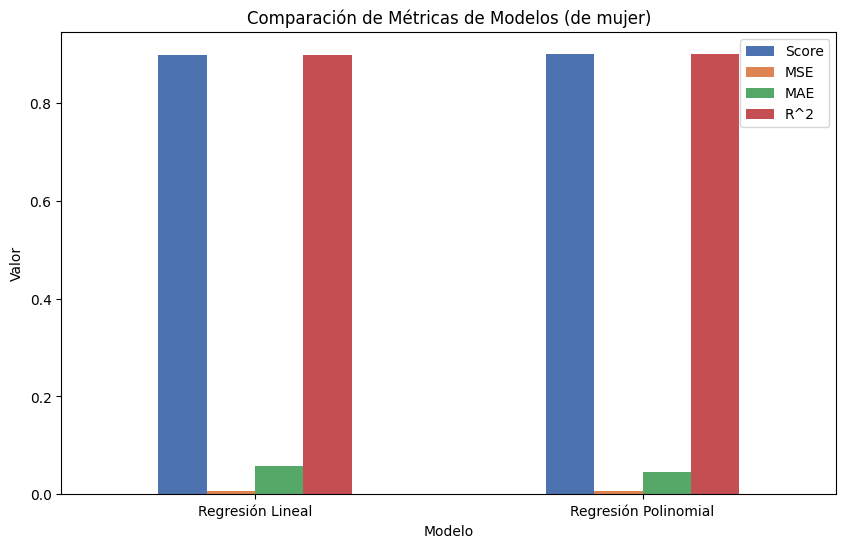

In [47]:
import seaborn as sns

sns.set_palette('deep') 
metrics_df.set_index('Modelo').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas de Modelos (de mujer)')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()